In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import load_data, calculate_profit, dataset_balancer

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading data

In [2]:
TRAINING_DATA = "training_data.csv"

In [3]:
categorical_features = load_data("categorical_features.csv")
numerical_features = load_data("numerical_features.csv")
targets = load_data("targets.csv")

In [4]:
categorical_features = categorical_features.iloc[:, 1:]
categorical_features

,OSOURCE_-,OSOURCE_AGS,OSOURCE_AMB,OSOURCE_AML,OSOURCE_AWK,OSOURCE_BRE,OSOURCE_BRK,OSOURCE_BRY,OSOURCE_CLL,OSOURCE_CMM,...,RFA_24_S2D,RFA_24_S2E,RFA_24_S3D,RFA_24_S3E,RFA_24_S4D,RFA_24_U1D,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
95409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
95410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
numerical_features = numerical_features.iloc[:, 1:]
numerical_features

,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,3712,60.000000,1.527773,3.886248,5.345699,0,0.152075,0.059166,1.116382,...,10.0,9512,8911,9003.000000,4.000000,7.741935,95515,0,4,39.0
1,1,5202,46.000000,1.000000,6.000000,9.000000,16,0.000000,0.000000,3.000000,...,25.0,9512,9310,9504.000000,18.000000,15.666667,148535,0,2,1.0
2,1,0,61.611649,1.527773,3.000000,1.000000,2,0.000000,0.000000,1.000000,...,5.0,9512,9001,9101.000000,12.000000,7.481481,15078,1,4,60.0
3,0,2801,70.000000,1.527773,1.000000,4.000000,2,0.000000,0.000000,0.000000,...,10.0,9512,8702,8711.000000,9.000000,6.812500,172556,1,4,41.0
4,0,2001,78.000000,1.000000,3.000000,2.000000,60,1.000000,0.000000,9.000000,...,15.0,9601,7903,8005.000000,14.000000,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,0,61.611649,1.527773,3.886248,5.345699,0,0.152075,0.059166,1.116382,...,25.0,9602,9602,9151.022917,8.093739,25.000000,184568,0,1,12.0
95408,1,5001,48.000000,1.000000,7.000000,9.000000,1,0.000000,0.000000,1.000000,...,20.0,9603,9603,9151.022917,8.093739,20.000000,122706,1,1,2.0
95409,1,3801,60.000000,1.527773,3.886248,5.345699,0,0.152075,0.059166,1.116382,...,10.0,9610,9410,9501.000000,3.000000,8.285714,189641,1,3,34.0
95410,0,4005,58.000000,1.527773,7.000000,5.345699,0,0.152075,0.059166,1.116382,...,18.0,9701,8612,8704.000000,4.000000,12.146341,4693,1,4,11.0


In [6]:
targets = targets.iloc[:, 1:]
targets

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


# Selecting best features

In [7]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [8]:
kb_cat = SelectKBest(chi2, k=10)

In [9]:
kb_num = SelectKBest(f_classif, k=50)

In [10]:
y = targets.to_numpy().ravel()
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
X_num = kb_num.fit_transform(numerical_features, y)

In [12]:
X_cat = kb_cat.fit_transform(categorical_features, y)

In [13]:
X = np.concatenate((X_cat, X_num), axis=1)
X.shape

(95412, 60)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Balancing training data 

In [19]:
X_train, y_train = dataset_balancer(X_train, y_train)

# Model selection

In [22]:
# profit_measure = make_scorer(calculate_profit)

In [23]:
models = [
    GaussianNB(),
    LogisticRegression()
]

In [24]:
parameters = [
    {'priors': [[round(i*0.1, 2), round(1-i*0.1, 2)] for i in range(1, 10)]},
    {'C': [.001, .01, .1, 1., 10., 100.], 'max_iter': [1000, 3000]}

]

In [25]:
def best_model_selection(models, parameters, X_train, y_train, X_test, y_test):
    trained_models = []
    for model, params in zip(models, parameters):
        clf = GridSearchCV(model, params, cv=5, scoring=profit_measure)
        clf.fit(X_train, y_train)
        # y_pred = clf.predict(X_test)
        print(f"classifier: {model}\nbest score: {clf.best_score_}\nbest params: {clf.best_params_}")
        trained_models.append(clf)
        
    return trained_models

In [26]:
# best_model_selection(models, parameters, X_train, y_train, X_test, y_test)

In [27]:
# model = GaussianNB(prior=[0.1, 0.9])
# clf = GridSearchCV(model, {'priors': [[round(i*0.1, 2), round(1-i*0.1, 2)] for i in range(1, 10)]})
priors = [[round(i*0.1, 2), round(1-i*0.1, 2)] for i in range(1, 10)]
profits = []

for prior in priors:
    clf = GaussianNB(priors=prior)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    profits.append(calculate_profit(y_test, y_pred))

In [28]:
prior_str = [f"{prior[0]}-{prior[1]}" for prior in priors]

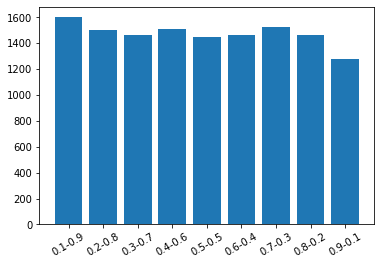

In [29]:
plt.bar(prior_str, profits)
plt.xticks(rotation=30)
plt.show()

In [30]:
# model = LogisticRegression()
# clf = GridSearchCV(model, {'C': [.001, .01, .1, 1., 10., 100.], 'max_iter': [1000, 3000]})

# c_values = [.001, .01, .1, 1., 10., 100.]
# num_of_iterations = [100, 500, 1000]

# heatmap = np.empty((len(c_values), len(num_of_iterations)))

# for i, c in enumerate(c_values):
#     for j, iter_ in enumerate(num_of_iterations):
#         clf = LogisticRegression(C=c, max_iter=iter_)
#         clf.fit(X_train, y_train)
#         y_pred = clf.predict(X_test)
#         heatmap[i, j] = calculate_profit(y_test, y_pred)

In [31]:
# sns.heatmap(heatmap, xticklabels=num_of_iterations, yticklabels=c_values)

In [32]:
c_values = [.001, .01, .1, 1., 10., 100.]
profits = []

for c in c_values:
    clf = LogisticRegression(C=c, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    profits.append(calculate_profit(y_test, y_pred))

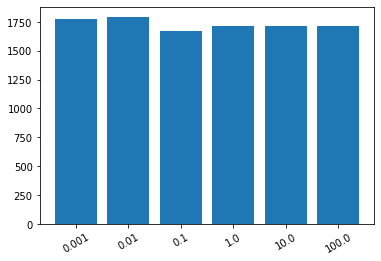

In [33]:
plt.bar(list(map(str, c_values)), profits)
plt.xticks(rotation=30)
plt.show()

In [34]:
depths = [3, 5, 7, 9, 11]
profits = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    profits.append(calculate_profit(y_test, y_pred))

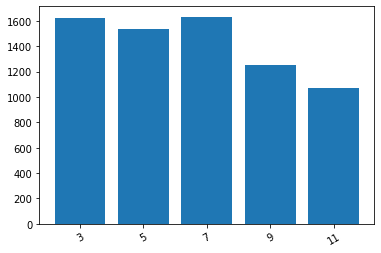

In [35]:
plt.bar(list(map(str, depths)), profits)
plt.xticks(rotation=30)
plt.show()

In [36]:
estimators = [50, 100, 150, 200]
profits = []

for estimator in estimators:
    clf = RandomForestClassifier(n_estimators=estimator)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    profits.append(calculate_profit(y_test, y_pred))

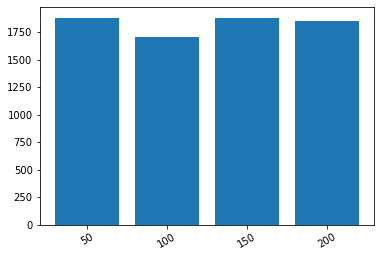

In [37]:
plt.bar(list(map(str, estimators)), profits)
plt.xticks(rotation=30)
plt.show()